In [1]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk import tokenize

### 1.
I chose Lemmatization because it allows you to reduce different inflected forms of a word to its base form (called a lemma), which helps improve the accuracy of text analysis. Stemming wouldn be apropriate here because it might remove word endings without considering the context of the word

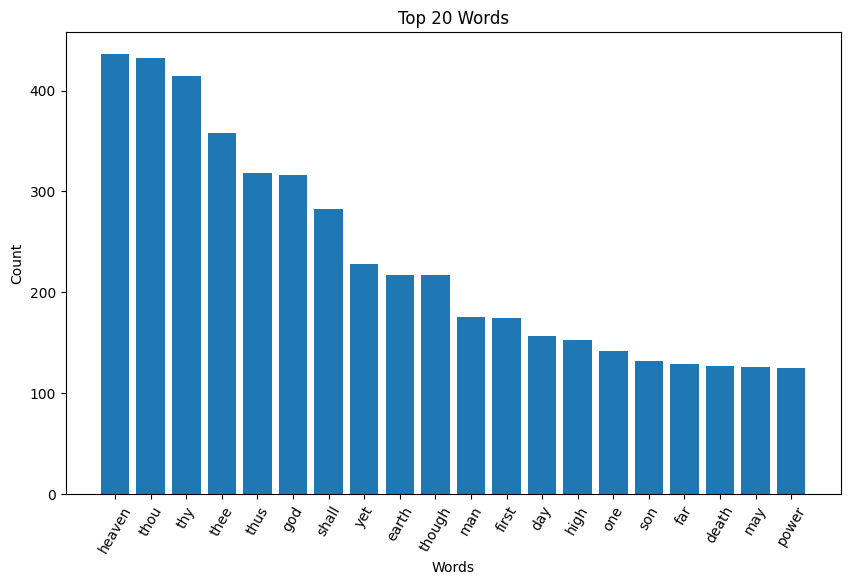

[('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), ('earth', 217), ('though', 217), ('man', 176), ('first', 175), ('day', 157), ('high', 153), ('one', 142), ('son', 132), ('far', 129), ('death', 127), ('may', 126), ('power', 125)]


In [2]:
def paradiselost():
    w = gutenberg.words("milton-paradise.txt")
    l = WordNetLemmatizer()
    word_stop = set(stopwords.words("english"))
    
    processed_words = [
        l.lemmatize(word.lower())
        for word in w
        if word.lower() not in word_stop
        and word.isalpha() 
        and len(word) > 2 
]
    counts = Counter(processed_words)
    t_w = counts.most_common(20)
    w_list = []
    c_list = []

    for word, count in t_w:
        w_list.append(word)
        c_list.append(count)
    plt.figure(figsize=(10, 6))
    plt.bar(w_list, c_list)
    plt.xticks(rotation=60)
    plt.title("Top 20 Words")
    plt.ylabel("Count")
    plt.xlabel("Words")
    plt.show()

    return t_w

t_w = paradiselost()
print(t_w)

### 3.
The archaic language of the book has some challenges with generating accurate senitmental analysis. For positive passages, their ratings are high due to words such as 'light' or 'happy'; however, the tool overlooks the broader context. Negative sentences are scored much lower in comparison to positive sentences because they are about dark concepts like despair. These sentences are missing a reflective like tone. And for neutral sentences, i would say that most sentences classified as "neutral" arent actually neutral because they display specific and emotional context. Thus, VADER is a good model but has trouble in defining sentences that have explicit emotional/literary conceptst in them.

In [6]:
def extraction(file_id):
    r = gutenberg.sents(file_id)
    c = [" ".join(sentence).strip() for sentence in r]
    return c

def categorizing(sentences, analyzer, pos_threshold=0.5, neg_threshold=-0.5):
    pos = []
    neg = []
    neutral = []
    
    for s in sentences:
        sentiment = analyzer.polarity_scores(s)
        compound = sentiment['compound']
        
        if compound > pos_threshold:
            pos.append((s, compound))

        elif compound < neg_threshold:
            neg.append((s, compound))

        else:
             neutral.append((s, sentiment['neu']))
    
    return pos, neg, neutral

def sorting(p, n, neu):
    s_p = sorted(p, key = lambda i: i[1], reverse = True)
    s_n = sorted(n, key = lambda i: i[1])
    s_neutral = sorted(neu, key = lambda i: i[1], reverse = True)
    return s_p, s_n, s_neutral

def top_sentences(s_p, s_n, s_neutral, top_n=5):

    print("5 most positive:")
    for sentence, score in s_p[:top_n]:
        print(f"• {sentence} (Compound Score: {score})")
    
    print("\n5 most negative:")
    for sentence, score in s_n[:top_n]:
        print(f"• {sentence} (Compound Score: {score})")
    
    print("\n5 most neutral:")
    for sentence, score in s_neutral[:top_n]:
        print(f"• {sentence} (Neutral Score: {score})")

def main():

    g_file = 'milton-paradise.txt'
    a = SentimentIntensityAnalyzer()
    b = extraction(g_file)
    positive, negative, neutral = categorizing(b, a)
    sorted_positive, sorted_negative, sorted_neutral = sorting(positive, negative, neutral)
    top_sentences(sorted_positive, sorted_negative, sorted_neutral, top_n=5)

if __name__ == "__main__":
    main()

5 most positive:
• Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the great luminar

### Extra Credit

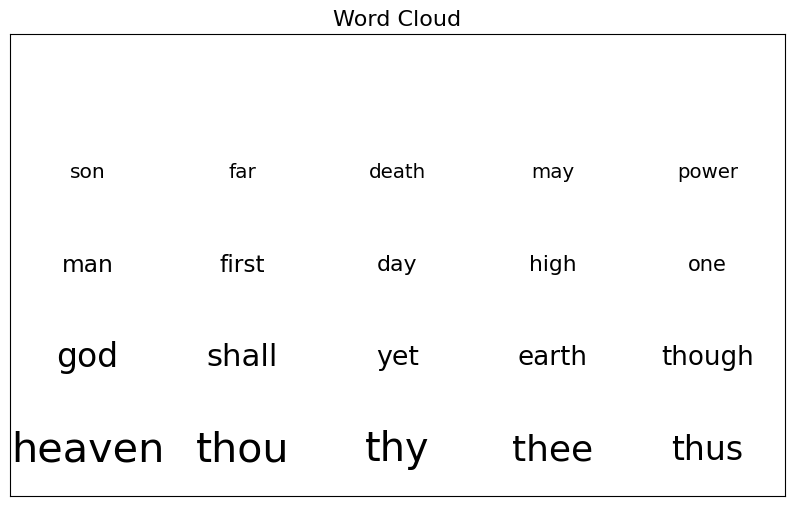

In [7]:
t_w = [
    ('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), 
    ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), 
    ('earth', 217), ('though', 217), ('man', 176), ('first', 175), 
    ('day', 157), ('high', 153), ('one', 142), ('son', 132), 
    ('far', 129), ('death', 127), ('may', 126), ('power', 125)
]

def t_s(count):
    return 8 + count / 200 * 10

plt.figure(figsize=(10, 6))

for m, (word, count) in enumerate(t_w):
    plt.text(
        m % 5 * 20 + 10,  
        m // 5 * 20 + 10, 
        word,
        ha='center',
        va='center',
        size = t_s(count)
    )

plt.axis([0, 100, 0, 100]) 
plt.xticks([]) 
plt.yticks([]) 
plt.title("Word Cloud", fontsize=16)
plt.show()